<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Fitting Parametric Distributions  in Python 


#### Michael Pyrcz, Associate Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Data Analytics: Fitting Parametric Distributions

Here's a demonstration of fitting parametric distributions in Python. This demonstration is part of the resources that I include for my courses in Spatial / Subsurface Data Analytics at the Cockrell School of Engineering at the University of Texas at Austin.  

#### Parametric Distributions

We will cover fitting the following distribution:

* Gaussian

For more information about working with parametric distributions in Python see this [demonstration](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_ParametricDistributions.ipynb).


I have a lecture on these parametric distributions available on [YouTube](https://www.youtube.com/watch?v=U7fGsqCLPHU&t=1687s).  

#### Fitting Parametric Distributions

With distribution fitting we are maximizing the likelihood function, $L(\theta)$:

\begin{equation}
L(\theta) = \prod^{n}_{\alpha=1} f\left(x_{\alpha} | \theta \right)
\end{equation}

the product sum of the probablity of the data, $f\left(x_{\alpha}\right)$ over all the data $\alpha = 1,\ldots,n$, given the set of distribution parameters, $\theta$. 

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV_v4.csv at https://git.io/fhHLT.

#### Importing Packages

We will need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import random                             # for randon numbers

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [2]:
#os.chdir("c:/PGE383")                     # set the working directory

### Guassian Distribution

Let's now use the Gaussian parametric distribution.

* we assume the parameters, mean and the variance

We will demonstrate the use of the parametric distribution with the forward, $f_x(x)$ and $F_x(x)$, and reverse, $F^{-1}_x(x)$, operations and calculate the summary statistics.

The mean is 0.15.
The variance is 0.0009.


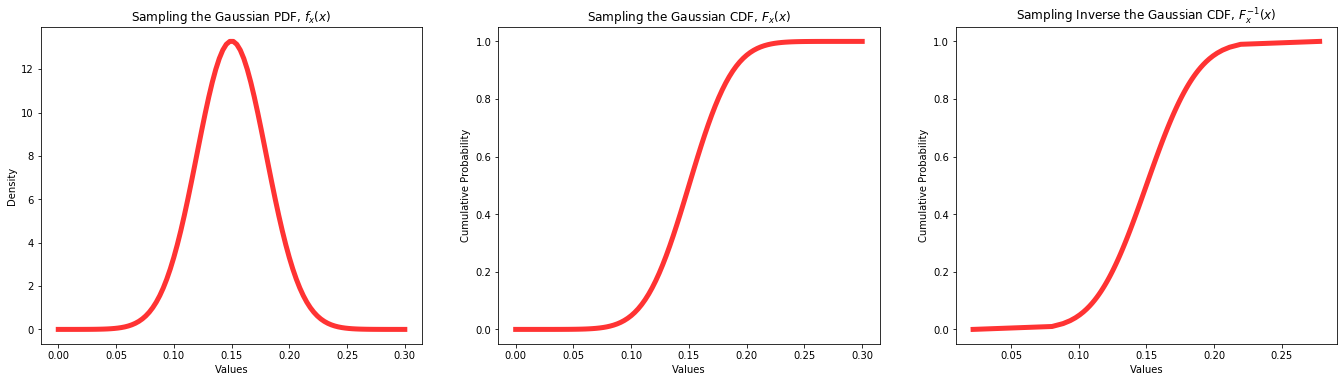

In [3]:
from scipy.stats import norm as my_dist                                      # import traingular dist as my_dist
dist_type = 'Gaussian'                                                       # give the name of the distribution for labels
mean = 0.15; stdev = 0.03                                                    # given the distribution parameters

x_values = np.linspace(0.0,0.3,100)                                          # get an array of x values
p_values = my_dist.pdf(x_values, loc = mean, scale = stdev)                  # calculate density for each x value
P_values = my_dist.cdf(x_values, loc = mean, scale = stdev)                  # calculate cumulative probablity for each x value

plt.subplot(1,3,1)                                                           # plot the resulting PDF
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')

plt.subplot(1,3,2)                                                           # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

p_values = np.linspace(0.00001,0.99999,100)                                  # get an array of p-values
x_values = my_dist.ppf(p_values, loc = mean, scale = stdev)                  # apply inverse to get x values from p-values
plt.subplot(1,3,3)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.title('Sampling Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

print('The mean is ' + str(round(my_dist.mean(loc = mean, scale = stdev),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(loc = mean, scale = stdev),4)) + '.')


#### Fitting the Distribution

Let's make a random dataset and then fit it with a Gaussian distribution.

* we do $n$ random samples, Monte Carlo simulations, from the Gaussian parametric distribution with parameters $mean$ and $stdev$.

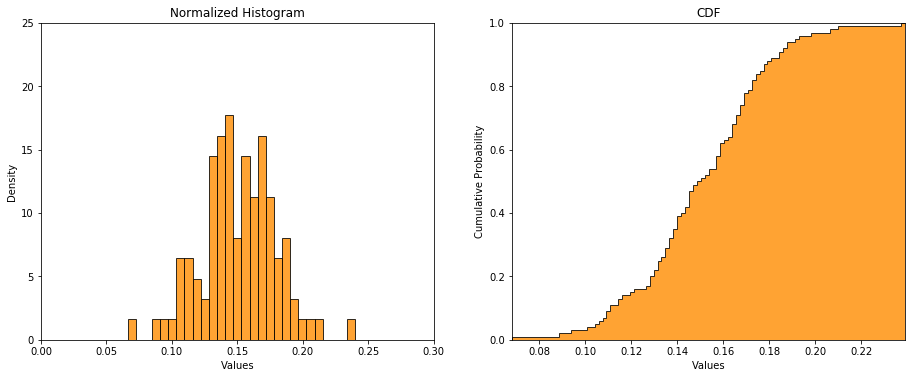

In [4]:
n = 100
samples = my_dist.rvs(size=int(n), loc = mean, scale = stdev, random_state = 73073).tolist() # make a synthetic dataset

plt.subplot(1,2,1)                                                 # plot the binned PDF
plt.hist(samples,bins = np.linspace(mean-3*stdev,mean+3*stdev,30), density = True, color = 'darkorange', edgecolor = 'black', alpha = 0.8)
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Normalized Histogram')
 
plt.subplot(1,2,2)                                                 # plot the CDF
plt.hist(samples, bins = len(samples), density = True, color = 'darkorange', edgecolor = 'black', cumulative = True, histtype = 'stepfilled',alpha = 0.8)
plt.xlim([np.min(samples),np.max(samples)]); plt.ylim(0,1); plt.xlabel('Values'); plt.ylabel('Cumulative Probability'); plt.title('CDF')
 
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3)

MLE mean = 0.151, MLE standard deviation = 0.028


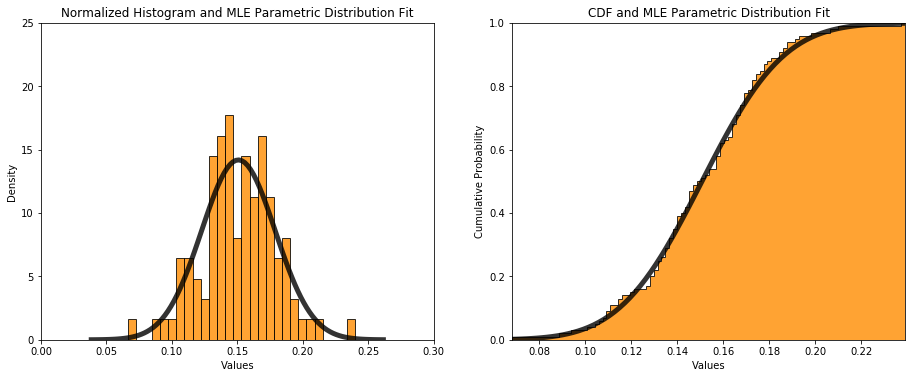

In [5]:
plt.subplot(1,2,1)                                                 # plot the binned PDF
plt.hist(samples,bins = np.linspace(mean-3*stdev,mean+3*stdev,30), density = True, color = 'darkorange', edgecolor = 'black', alpha = 0.8)
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Normalized Histogram and MLE Parametric Distribution Fit')
 
x = np.linspace(my_dist.ppf(0.0001, loc = mean, scale = stdev),my_dist.ppf(0.9999, loc = mean, scale = stdev), 100)

fit_mean, fit_stdev = my_dist.fit(samples,loc = mean, scale = stdev) # fit MLE of the distribution parameters
print('MLE mean = ' + str(round(fit_mean,3)) + ', MLE standard deviation = ' + str(round(fit_stdev,3)))

plt.plot(x, my_dist.pdf(x, loc = fit_mean, scale = fit_stdev), 'black', lw=5, alpha=0.8, label='norm pdf')
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density')

plt.subplot(1,2,2)                                                 # plot the binned PDF with the fit parametric distribution
plt.hist(samples, bins = len(samples), density = True, color = 'darkorange', edgecolor = 'black', cumulative = True, histtype = 'stepfilled',alpha = 0.8)
plt.xlim([np.min(samples),np.max(samples)]); plt.ylim(0,1); plt.xlabel('Values'); plt.ylabel('Cumulative Probability'); plt.title('CDF and MLE Parametric Distribution Fit')
                                                                    
plt.plot(x, my_dist.cdf(x, loc = fit_mean, scale = fit_stdev), 'black', lw=5, alpha=0.8, label='norm pdf') # plot the CDF with the fit parametric distribution

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3)

#### Fitting a Parametric Distribution by Calculating the Parameters from the Data

What if we just calculate the mean and standard deviation from the sample data to use as our 'fit' parametric distribution?

* this may work well if there are no outliers, e.g., if there are a couple very high values the mean would shift up and the over distribution fit would be poor

* in this case we get about the same results as the maximum likelihood estimation of the distribution parameters

Sample data mean = 0.151, MLE standard deviation = 0.028


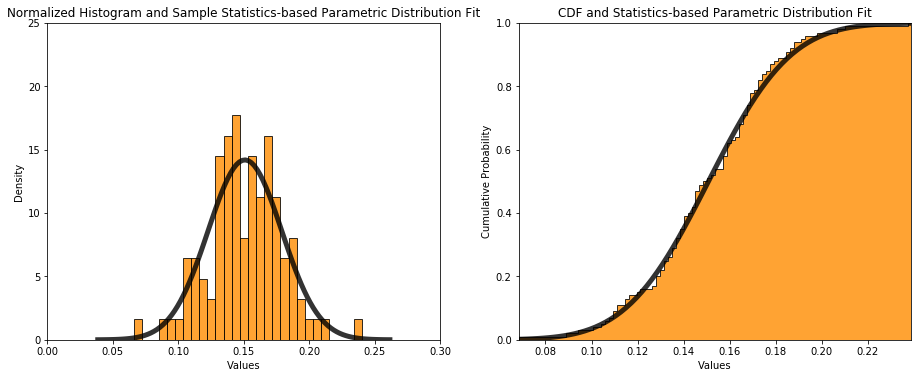

In [6]:
plt.subplot(1,2,1)                                                 # plot the binned PDF
plt.hist(samples,bins = np.linspace(mean-3*stdev,mean+3*stdev,30), density = True, color = 'darkorange', edgecolor = 'black', alpha = 0.8)
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Normalized Histogram and Sample Statistics-based Parametric Distribution Fit')
 
x = np.linspace(my_dist.ppf(0.0001, loc = mean, scale = stdev),my_dist.ppf(0.9999, loc = mean, scale = stdev), 100)

mean = np.mean(samples); stdev = np.std(samples)

print('Sample data mean = ' + str(round(mean,3)) + ', MLE standard deviation = ' + str(round(stdev,3)))

plt.plot(x, my_dist.pdf(x, loc = mean, scale = stdev), 'black', lw=5, alpha=0.8, label='norm pdf')
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density')

plt.subplot(1,2,2)                                                 # plot the binned PDF with the fit parametric distribution
plt.hist(samples, bins = len(samples), density = True, color = 'darkorange', edgecolor = 'black', cumulative = True, histtype = 'stepfilled',alpha = 0.8)
plt.xlim([np.min(samples),np.max(samples)]); plt.ylim(0,1); plt.xlabel('Values'); plt.ylabel('Cumulative Probability'); plt.title('CDF and Statistics-based Parametric Distribution Fit')
                                                                    
plt.plot(x, my_dist.cdf(x, loc = mean, scale = stdev), 'black', lw=5, alpha=0.8, label='norm pdf') # plot the CDF with the fit parametric distribution

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3)

There are many other parametric distributions that we could have included, but I have met my goal of providing a concise demonstration of distribution fitting. 

#### Comments

This was a basic demonstration of fitting parametric distributions. 

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at [Python Demos](https://github.com/GeostatsGuy/PythonNumericalDemos) and a Python package for data analytics and geostatistics at [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
